In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

In [2]:
import pandas as pd


In [3]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [4]:
paths=[]
labels=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print("dataset is loaded")       
        
        

dataset is loaded


In [5]:
paths[5:10]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pain_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_fall_fear.wav']

In [6]:
labels[:10]

['fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear']

In [7]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()


,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [8]:
df.describe()

,speech,label
count,5600,5600
unique,5600,7
top,/kaggle/input/toronto-emotional-speech-set-tes...,fear
freq,1,800


In [9]:
df

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear
...,...,...
5595,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5596,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5597,/kaggle/input/toronto-emotional-speech-set-tes...,ps
5598,/kaggle/input/toronto-emotional-speech-set-tes...,ps


In [10]:
df['speech'].value_counts()

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav                                                       1
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_walk_neutral.wav          1
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_vine_neutral.wav          1
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_chat_neutral.wav          1
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_puff_neutral.wav          1
                                                                                                                                                      

In [11]:
df['label'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

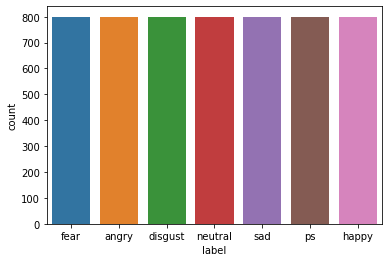

In [12]:
sns.countplot(df['label'])

In [13]:
def waveshow(data,sr,emotion):
    plt.figure(figsize=(12,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()    
    

In [14]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[2]
path

'/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav'

In [15]:
data,sampling_rate=librosa.load(path)


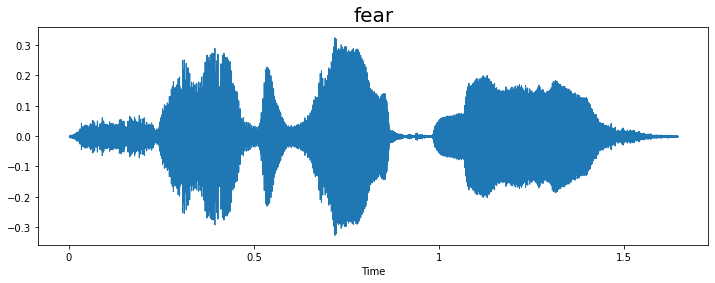

In [16]:
waveshow(data,sampling_rate,emotion)

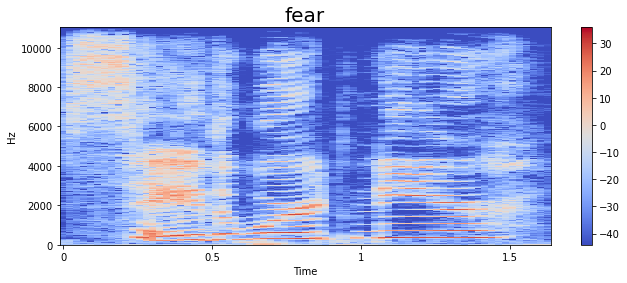

In [17]:
spectogram(data,sampling_rate,emotion)

In [18]:
Audio(path)

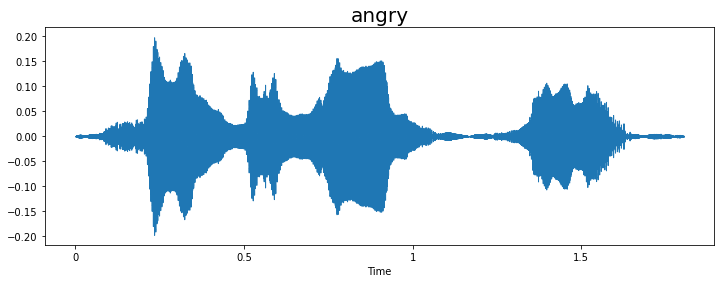

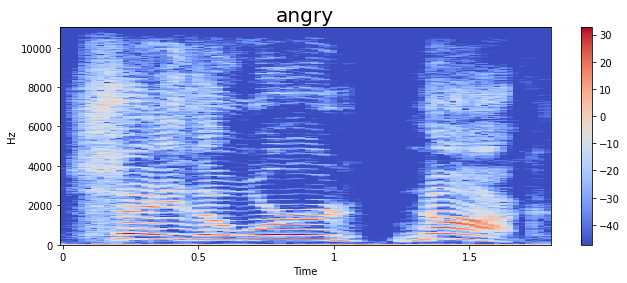

In [19]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[8]
path
data,sampling_rate=librosa.load(path)
waveshow(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

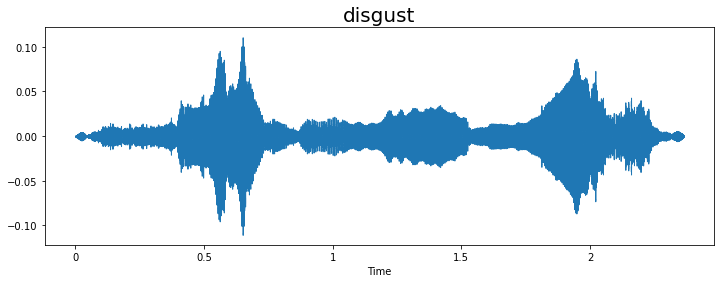

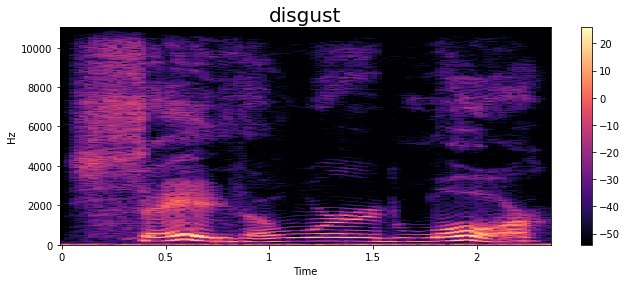

In [20]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[78]
data,sampling_rate=librosa.load(path)
waveshow(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [21]:
df['label'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

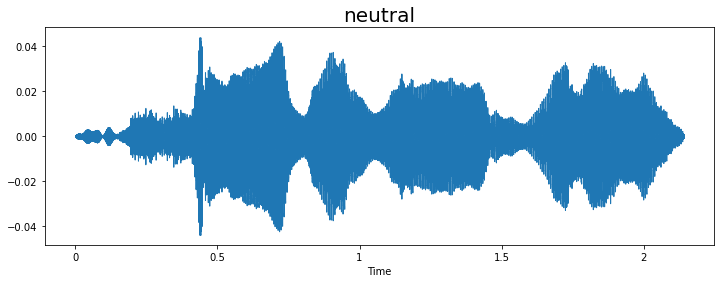

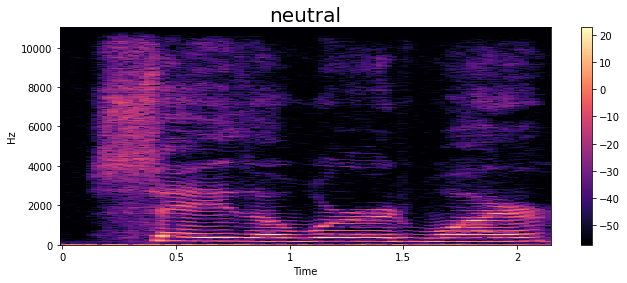

In [22]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[45]
data,sr=librosa.load(path)
waveshow(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

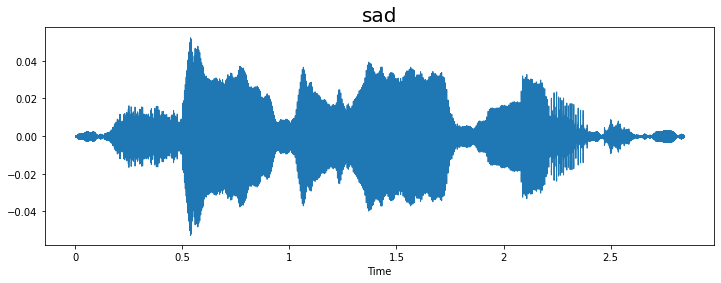

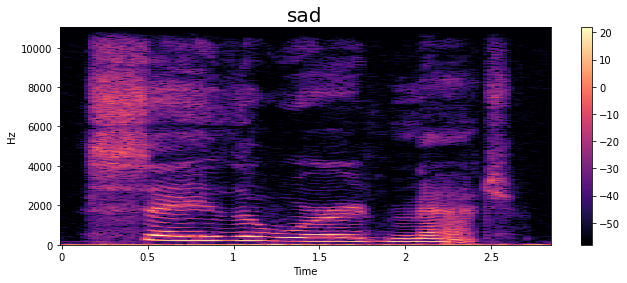

In [23]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[97]
data,sr=librosa.load(path)
waveshow(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

In [24]:
label=df['label']

In [25]:
label.value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

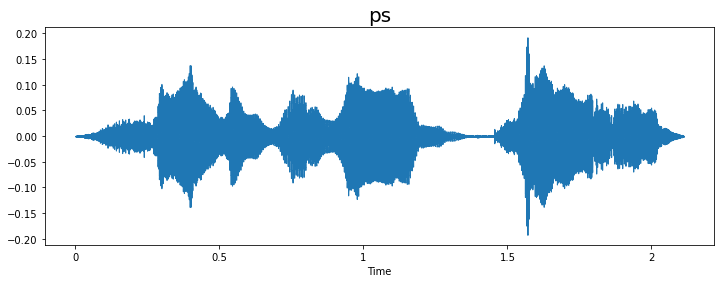

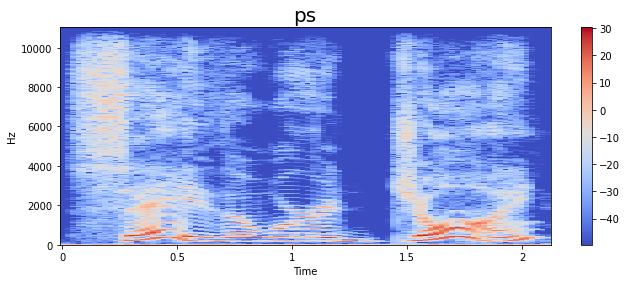

In [26]:
emotion='ps'
path=np.array(df['speech'][df['label']==emotion])[54]
data,sr=librosa.load(path)
waveshow(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

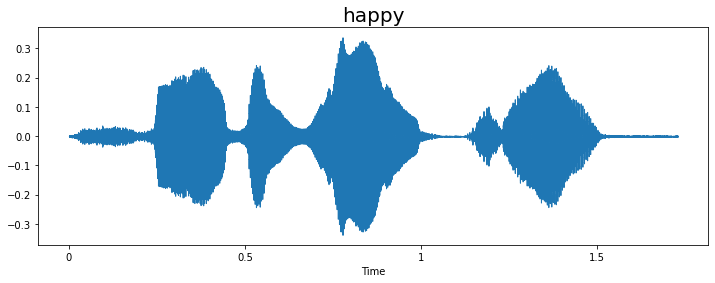

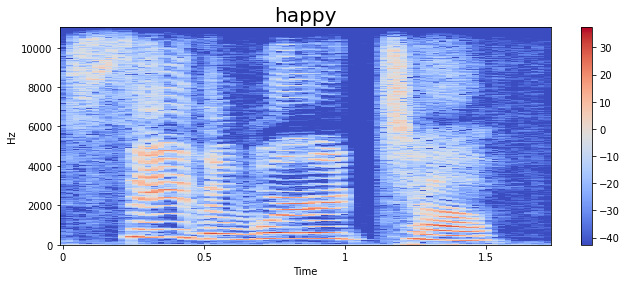

In [27]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[45]
data,sr=librosa.load(path)
waveshow(data,sr,emotion)
spectogram(data,sr,emotion)
Audio(path)

In [28]:
data


array([-4.8077900e-06,  3.1206766e-04,  1.8158463e-04, ...,
        1.0568020e-03,  5.0266541e-04,  0.0000000e+00], dtype=float32)

In [29]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [30]:
extract_mfcc(df['speech'][1])

array([-3.48742645e+02,  3.57785988e+01, -4.43022251e+00,  1.52522507e+01,
        5.82787895e+00, -1.78589329e-01, -4.67970705e+00, -6.93250751e+00,
       -2.07018948e+01,  1.75327015e+00, -1.44479113e+01,  2.00427365e+00,
       -3.30476022e+00,  2.95499277e+00, -8.58629793e-02,  3.24206829e+00,
       -2.10634422e+00,  2.14532032e+01,  6.35283184e+00,  2.13170815e+01,
        2.29679489e+01,  1.91632080e+01,  3.83719325e+00,  4.95957088e+00,
       -6.93415928e+00,  7.85022163e+00,  1.32000849e-01,  3.19725704e+00,
       -1.16298685e+01, -9.74097061e+00, -3.26298523e+00,  7.39324427e+00,
       -2.00577426e+00, -6.83189058e+00, -1.27633619e+01,  3.49388933e+00,
        1.54459155e+00, -5.06909728e-01,  2.16548309e-01,  9.48708534e+00],
      dtype=float32)

In [31]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [32]:
x_mfcc


0       [-286.02704, 86.23414, -2.635008, 22.56944, -1...
1       [-348.74265, 35.7786, -4.4302225, 15.252251, 5...
2       [-340.4982, 54.36257, -14.845929, 21.453777, 8...
3       [-307.126, 21.987495, -5.146962, 7.2266817, -8...
4       [-345.27826, 47.107338, -24.942877, 20.17883, ...
                              ...                        
5595    [-374.88943, 61.58835, -0.7048707, 9.159214, -...
5596    [-314.5199, 40.65166, -6.461393, -3.05994, -51...
5597    [-358.06696, 78.64016, -15.999416, 2.9611573, ...
5598    [-353.46466, 102.15106, -14.645692, -11.564197...
5599    [-389.82825, 54.579174, 0.8075471, -0.8762022,...
Name: speech, Length: 5600, dtype: object

In [33]:
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(5600, 40)

In [34]:
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [36]:
y.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [37]:
y=y.toarray()

In [38]:
y.shape



(5600, 7)

# import numpy as np


In [39]:
data

array([-4.8077900e-06,  3.1206766e-04,  1.8158463e-04, ...,
        1.0568020e-03,  5.0266541e-04,  0.0000000e+00], dtype=float32)

In [40]:
#splitting the dataset intlo trainng and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
x_train.shape

(4480, 40, 1)

In [42]:
y_train.shape

(4480, 7)

In [43]:
x_test.shape

(1120, 40, 1)

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax'),
    
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 123)               61500     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                7936      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)               

In [75]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [76]:
history=model.fit(x_train,y_train,validation_split=0.33,epochs=1000,batch_size=512,shuffle=True,callbacks=early_stopping)

Epoch 1/1000
6/6 [==============================] - 2s 85ms/step - loss: 1.8730 - accuracy: 0.2589 - val_loss: 1.7800 - val_accuracy: 0.4402
Epoch 2/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.7477 - accuracy: 0.3476 - val_loss: 1.6294 - val_accuracy: 0.4503
Epoch 3/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.6135 - accuracy: 0.4075 - val_loss: 1.4783 - val_accuracy: 0.5024
Epoch 4/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.5074 - accuracy: 0.4292 - val_loss: 1.3277 - val_accuracy: 0.5531
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.3629 - accuracy: 0.4768 - val_loss: 1.1616 - val_accuracy: 0.6051
Epoch 6/1000
6/6 [==============================] - 0s 13ms/step - loss: 1.2307 - accuracy: 0.5195 - val_loss: 1.0354 - val_accuracy: 0.6220
Epoch 7/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.1550 - accuracy: 0.5365 - val_loss: 0.9116 - val_accuracy: 0.7052
Epoch 8/1000


In [77]:
x_test.shape

(1120, 40, 1)

In [78]:
y_test.shape

(1120, 7)

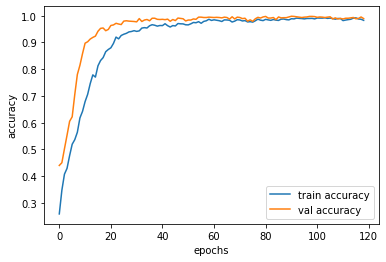

In [79]:
epochs = list(range(119))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

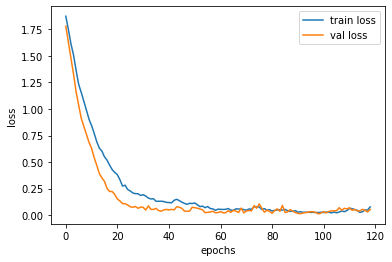

In [80]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [81]:
data


array([-4.8077900e-06,  3.1206766e-04,  1.8158463e-04, ...,
        1.0568020e-03,  5.0266541e-04,  0.0000000e+00], dtype=float32)

In [82]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.9857142567634583


In [83]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [117]:
# making the predictions and evaluating the model

#predicting the test set results
y_pred=model.predict(x_test)
y_pred=(y_pred>=0.6)

In [120]:
y_test1=y_test==1
y_test1

array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [121]:
y_pred

array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [124]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test1)
score

0.9821428571428571

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
classification_report(ytest,y_pred,digits=3)